In [46]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [47]:
X, Y,cof =make_regression(n_samples=500, n_features=1, bias=4.2, noise=5.1, coef=True)
print X.shape, Y.shape, cof

(500, 1) (500,) 73.3552655365


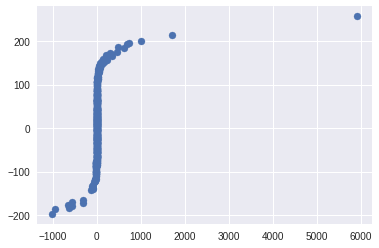

In [48]:
plt.figure(0)
sns.plt.scatter(X[:,0]**7,Y)

In [49]:
split=int (0.8*X.shape[0])
X_train=X[:split]
X_test=X[split:]

y_train=Y[:split]
y_test=Y[split:]

In [50]:
# hypothesis function
def hypothesis(x, w):
    return x*w[1] + w[0]

# error compute
def get_error(y_true, x, w):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the square error
        err += (y_true[ix] - hypothesis(x[ix], w))**2
    # Get mean sq. error
    err = err / (2*m)
    return err

# error gradient
def get_grads(y_true, x, w):
    grad_00 = 0.0
    grad_01 = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_00 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_01 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
    
    # Get mean grads
    grad_00 = grad_00 / m
    grad_01 = grad_01 / m
    return [grad_00, grad_01]

# update weights using grad. desc.
def grad_descent(x, y_true, w, learning_rate=0.1):
    error = get_error(y_true, x, w)
    [grad_00, grad_01] = get_grads(y_true, x, w)
    
    w[0] = w[0] - learning_rate*grad_00
    w[1] = w[1] - learning_rate*grad_01
    
    return error, w

In [51]:
W=np.array([0.1, 0.1])
loss=[]

In [52]:
l,W=grad_descent(X_train,y_train,W,)
loss.append(l)

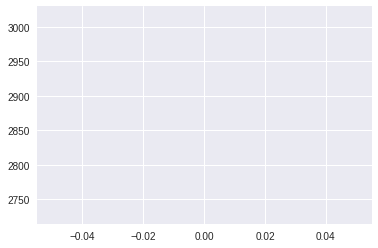

In [53]:
plt.plot(loss)

In [54]:
print W

[ 0.74367385  7.91726529]


In [55]:
print 2*get_error(y_test,X_test,W)

[ 4001.70584628]


In [56]:
print loss

[array([ 2872.12510366])]


In [57]:
y_test.mean()

7.0150198786631037

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
print LinearRegression().fit(X_train,y_train).score(X_train,y_train)

0.995638822962


In [60]:
import pandas as pd


In [68]:
-np.log2(0.75)

0.41503749927884381

(500, 2) (500, 2)
